
# Perceptron Algorithm in Python

<img src="P.png" style="height:280px">

Image from: https://www.educba.com/perceptron-learning-algorithm/

In [267]:
import numpy as np
import os
import pandas as pd 
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

## Perceptron on the Iris dataset from class.

In [268]:
iris = pd.read_csv('iris_csv.csv')
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [269]:
xdata = [np.array([iris['sepallength'][i], iris['sepalwidth'][i]]) for i in range(101)]

ydata = [] 
for y in iris['class'][0:101]:
    
        if y == 'Iris-setosa': 
            ydata.append(1)
        else:
            ydata.append(-1)

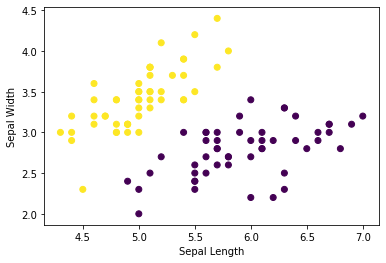

In [270]:
xdataplot = [x for x in (iris.sepallength[0:101], iris.sepalwidth[0:101])]
plt.scatter(xdataplot[0],xdataplot[1],c=ydata)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [271]:
def sign(w, x): #sign function
    if w @ x < 0:
        return -1
    else:
        return 1
    
def Perceptron(X, Y, epochs): #Perceptron function
    w = np.random.rand(2)
    num = len(X)
    counter = 1
    while counter < epochs: 
        
        for _ in range(epochs):
            i = np.random.randint(num)
            if sign(w, X[i]) != Y[i]:
                w += Y[i]*X[i]
        counter += 1
        return w

### 'train' will train our function, we will choose to iterate our function over 10,000 times.

In [272]:
train=Perceptron(xdata,ydata,10000)
train

array([-44.87672891,  77.65644935])

In [273]:
def predict(train, i): #predictor function, play around with different values
    if sign(train, xdata[i]) == 1:
        return 'Setosa'
    else:
        return 'Versicolor'

In [274]:
predict(train, 10)

'Setosa'

In [275]:
predict(train, 100)

'Versicolor'

In [276]:
predict(train, 35)

'Setosa'

In [277]:
predict(train, 70)

'Versicolor'

In [278]:
predict(train, 90)

'Versicolor'

## Now we will use our perceptron functions on the life expectancy dataset.
### Using Life expectancy data from males and females we will predict if that country is in Europe or Asia.

In [283]:
life_exp = pd.read_csv('Life_expectancy_dataset.csv')
life_exp

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [286]:
life_exp = life_exp[(life_exp['Continent'] == 'Europe') | (life_exp['Continent'] == 'Asia') ]
life_exp = life_exp.reset_index(drop=True)
life_exp

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
95,170,Burma,66.6,64.2,69.2,Asia
96,175,Yemen,65.5,63.4,67.8,Asia
97,180,Cambodia,64.5,62.0,67.1,Asia
98,181,Laos,64.3,62.2,66.4,Asia


In [306]:
xdata1 = [np.array([life_exp['Male Life'][i], life_exp['Female Life'][i]]) for i in range(100)]

ydata1 = [] 
for y in life_exp['Continent'][0:100]:
    
        if y == 'Europe': 
            ydata1.append(1)
        else:
            ydata1.append(-1)

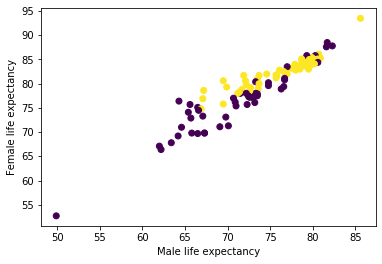

In [312]:
xdataplot1 = [x for x in (life_exp['Male Life'], life_exp['Female Life'])]
plt.scatter(xdataplot1[0],xdataplot1[1],c=ydata1)

plt.xlabel('Male life expectancy')
plt.ylabel('Female life expectancy')
plt.show()

In [330]:
train_life=Perceptron(xdata1,ydata1,10000)
train_life

array([-605.09107226,  551.33483028])

In [331]:
def predict_life(train_life, i): #predictor function, play around with different values
    if sign(train_life, xdata1[i]) == 1:
        return 'Europe'
    else:
        return 'Asia'

In [332]:
predict_life(train_life, 90)

'Europe'

In [333]:
predict_life(train_life, 50)

'Europe'

In [334]:
predict_life(train_life, 70)

'Asia'

In [335]:
predict_life(train_life, 18)

'Asia'

In [336]:
predict_life(train_life, 54)

'Europe'

In [337]:
predict_life(train_life, 88)

'Asia'